# Tarea 1: Regresión Lineal
### Pontificia Universidad Javeriana

<font size="3">Departamento de Ingeniería Electrónica</font>
<br>
<font size="3">Inteligencia Artificial</font>


Estudiante: Víctor Daniel Peraza Bolaños



## Preliminares

Antes de entrar en la temática de regresión lineal, importaremos las líbreias a usar: 
* Pandas
* Numpy
* Matplotlib
* Random
* ipywidgets

## Importante
### si los widgets presentan el error: _Error displaying widget: model not found_, la solución a esto es ejecutar el bloque de código correspondiente 

In [55]:
# Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import ipywidgets as widgets

%matplotlib inline

Y cargaremos los datos a usar: 

Los datos usados corresponden a una muestra de precios de viviendas con 6 criterios que influyen en el precio. Estos 6 criterios son: 
* _Transaction Date_
* _House Age_
* _Distance to Nearest MRT station_
* _Number of convenience stores_
* _Latitude_
* _Longitude_

In [4]:
# Carga de datos 
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [5]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## Regresión Lineal

La regresión lineal es una aplicación de aprendizaje supervisado en Machine Learning, debido a que trabaja con sets de datos los cuales estan etiquetados, es decir que incluyen ejemplos de entrada (_features_)  y de salidas (_labels_) correctas. 

De este entrenamiento mediante de datos etiquetados, se busca adaptarse lo mejor posible a los datos provistos, los cuales son continuos, a través de una función que permita predecir de la manera más correcta posible los valores provistas y también generar nuevas estimaciones y al mismo tiempo que dichas predicciones contengan el mínimo error posible. Dicha función permite estimar o generar una linea o superficie que mejor se ajuste a la nube de datos provista.   

La función que representará el modelo de regresión lineal es:

$$ \begin{equation} h_\theta(x^i) = \theta_0 + \theta_1 x_1 + \dots + \theta_i x_i 
\end{equation} $$

Como se trabaja con casos que tienen _n_ datos para las x^i variables y $\theta_d$ parámetros, suele emplearse la forma matricial
$$ \begin{equation} h_\theta(x^i) = A\theta
\end{equation} $$

Donde A es 

$$ 
\mathbf{A} =
\begin{bmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{d}^{(1)} & 1 \\
\vdots & \vdots & \ddots & \vdots & 1\\
\vdots & \vdots & \ddots & \vdots & 1 \\
x_{1}^{(n)} & x_{2}^{(n)} & \cdots & x_{d}^{(n)} & 1 \\
\end{bmatrix}
$$



In [6]:
# Representa la ecuacion h = A * theta
def h_theta(theta,A):
    return A@theta

## Función de Costo
Para poder medir el desempeño de nuestro modelo, se emplea una función de costo (_loss function_), que permite conocer cual será el error incurrido o costo de utilizar una serie de párametros para entrenar el modelo. La función de costo por ende permite evaluar que tan buenas o malas son las predicciones dadas por el modelo, partiendo desde la idea de que tan lejos se encuentra la estimación dada del valor (o la distancia entre ellos en el plano o la recta). 

Entre las diferentes funciones de costo posibles, una de las más comúnmente usadas es la función del Error Cuadrado Medio o Mean Least Squares, que viene dada por: 

$$ \begin{equation}
J_\theta = \frac{1}{m}\sum^m_{i-1}[h_\theta(x^{(i)})-y^{(i)}]^2 \\
\end{equation}$$
Donde 
$$ e = h_\theta(x^{(i)})-y^{(i)}$$
Por lo que se puede re expresar como: 
$$\begin{equation} J_\theta = \frac{1}{m}\sum^m_{i-1}e^Te
\end{equation}$$
Donde 
* $h(x^i)$ es la aproximación producida por la regresión
* $y^i$ es el valor real

In [7]:
# representa la forma J = (1/m) eT * e
def cost_j(theta, h, y):
    e = h - y
    m = len(y)
    J = (1/m * e.T@e)
    return J


Ahora bien, una vez determinada la función de costo a emplear, se necesita encontrar la forma de que el error del modelo sea el menor posible, ya que esto implicará que la aproximación generada por el modelo es lo suficientemente confiable. 

Para hacer esto, se utilizará la técnica del **Gradiente Descendiente**

## Gradient Descent o Gradiente Descendiente

La técnica del gradiente descendiente, permite generalizar la optimización de $J_\theta$ hacia el valor mínimo posible o lo que es lo mismo, el menor error posible. 

Esto lo hace mediante el cálculo del gradiente de la matriz o el vector de incógnitas, el cual permite encontrar el máximo del vector, sin embargo como lo que se desea es encontrar el mínimo, de este valor se procedera a ir en la dirección contraria del mayor valor, hasta finalmente encontrar el mínimo. Algunas consideraciones de este método son las siguientes: 

* El valor mínimo que se encuentra no es necesariamente el mínimo global.
* La elección de valores iniciales cambiará el camino seguido a lo largo del gradiente.

La fórmula de Gradiente Descendiente es la siguiente: 
   
$$ \begin{equation}
   \theta_{j+1} = \theta_{j} - \frac{\alpha}{m}\frac{\partial}{\partial \theta}J(\theta)
   \end{equation}$$

$$ \begin{equation}
   \theta_{j+1} = \theta_{j} - \frac{\alpha}{m}\frac{\partial}{\partial \theta}[h_\theta(x^{(i)})-y^{(i)}]^2 \\
   \end{equation}$$
   

Con los siguientes párametros esperados: 
* $ \theta_j $, la predicción o valor actual
* La tasa de aprendizaje $ \alpha $
* m la cantidad de datos del modelo
* La matriz A
* la salida del modelo $ h_\theta $
* La salida esperada y
Y retorna el parámetro actualizado $\theta_{j+1}$

Que al optimizar J, se puede reexpresar como: 

$$ \begin{equation}
   \theta_{j+1} = \theta_{j} - \frac{\alpha}{m} A^Te
   \end{equation}$$


Los valores obtenidos a lo largo de las iteraciones nos servirán para gráficar el función de *Loss vs Epoch*, permitiendo ver como se dio el proceso de aprendizaje del modelo y si el valor del paso $\alpha$ necesita algún ajuste

Las condiciones de paro que serán empleadas para la función son las siguientes: 
* _max_iterations_ -> Se llego a una cantidad máxima de iteraciones previamente especificada, por lo que el programa se detiene 
* _cost_diff_ -> La diferencia de costo entre la iteración anterior y la actual no ha cambiado, lo que indica que el modelo se ha estabilizado y no esta aprendiendo más. 


In [8]:
def derivate_J(theta,h,A,y):
    e = h - y
    m = len(y)
    dxJ = 1/m * A.T@e
    return dxJ

In [9]:
def update_theta(theta_j, alpha, A, h, y):
    e =  h - y
    m = len(y)
    res = theta_j - (alpha/m * A.T@e)
    return res

## Revisión de los datos
Una vez se han cargado los datos con los cuales vamos a entrenar nuestro modelo, una buen a práctica es revisar los datos con los que estaremos trabajando. 

Para ello, trabajaremos con una regresión lineal de una entrada, por lo que nuestras variables se verían de la siguiente forma: 

$$\begin{equation}
h_\theta = \theta_1 x^1 +\theta_0
\end{equation}$$

$$ 
\mathbf{A} =
\begin{bmatrix}
x_{1}^{(1)}  & 1 \\
\vdots    & 1\\
\vdots  & 1 \\
x_{1}^{(n)}  & 1 \\
\end{bmatrix}
$$

**Seleccione uno de los siguientes párametros para explorar su distribución**

In [10]:
# columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
columns = [col for col in data.columns ]
columns.remove('No')
columns.remove('Y house price of unit area')
section = widgets.RadioButtons(
    options=columns,
    value='X2 house age',
    description='Parameter to explore:',
    disabled=False,
)
display(section)

RadioButtons(description='Parameter to explore:', index=1, options=('X1 transaction date', 'X2 house age', 'X3…

Ahora, se calcula el gradiente descendiente para la columna seleccionada

In [56]:
ones = np.ones((len(data),1))
x = data[section.value]
y = data['Y house price of unit area']
A = np.column_stack((x,ones))
# A = np.column_stack((x,ones))

theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
h = h_theta(theta,A)

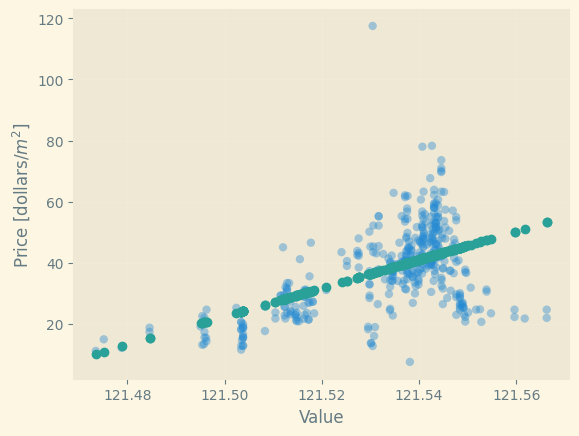

In [57]:
# Graficando las variables de interes

plt.scatter(data[section.value], data['Y house price of unit area'],alpha=0.4,edgecolor='none')
plt.xlabel('Value',fontsize=12)
plt.ylabel('Price [dollars/$m^2$]')
plt.scatter(x,h)
plt.grid(visible=True,alpha=0.2)

## Implementando Regresión Multivariable a través de Gradiente Descendiente

Ahora que ya se ha explorado la data previamente, para poder tener una noción como esta distribuida, se aplicará gradiente descendiente a todo el conjunto. 
Para aplicar Gradiente descendiente con una regresión multivariable, $h_\theta$ será de la siguiente forma:

$$ \begin{equation} h_\theta(x^i) = \theta_0 + \theta_1 x_1 + \dots + \theta_i x_i 
\end{equation} $$

Y el vector $\hat A$ volverá a ser:

$$ 
\mathbf{A} =
\begin{bmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{d}^{(1)} & 1 \\
\vdots & \vdots & \ddots & \vdots & 1\\
\vdots & \vdots & \ddots & \vdots & 1 \\
x_{1}^{(n)} & x_{2}^{(n)} & \cdots & x_{d}^{(n)} & 1 \\
\end{bmatrix}
$$


Y calcularemos $\theta$ con la función que se estableció previamente, que es
$$ \begin{equation}
   \theta_{j+1} = \theta_{j} - \frac{\alpha}{m} A^Te
   \end{equation}$$

Que se ejecutará un determinado de iteraciones. 

Los valores obtenidos a lo largo de las iteraciones nos servirán para gráficar el función de *Loss vs Epoch*, permitiendo ver como se dio el proceso de aprendizaje del modelo y si el valor del paso $\alpha$ necesita algún ajuste

Las condiciones de paro que serán empleadas para la función son las siguientes: 
* _max_iterations_ -> Se llego a una cantidad máxima de iteraciones previamente especificada, por lo que el programa se detiene 
* _cost_diff_ -> La diferencia de costo entre la iteración anterior y la actual no ha cambiado, lo que indica que el modelo se ha estabilizado y no esta aprendiendo más. 


**Seleccione las columnas a utilizar en el modelo**

In [79]:
checkbox_layout = widgets.Layout(
    display='flex',
    flex='70%',
    flex_flox='row wrap',
    align_items= 'center',
    align_content='stretch',
    width="100%"
)
options_widget = [widgets.Checkbox(description=col, layout=widgets.Layout(width='500px')) for col in columns]
display(widgets.HBox(children=options_widget, layout=checkbox_layout))

**Seleccione el valor de alpha a usar**

In [53]:
alpha_widget = widgets.FloatSlider(
    value=0.000005,
    min=0.0000001,
    max=0.00001,
    step=0.0000001,
    description='Alpha',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.7f',
)
display(alpha_widget)


FloatSlider(value=5e-06, continuous_update=False, description='Alpha', max=1e-05, min=1e-07, readout_format='.…

In [54]:
iters =widgets.IntText(
    value=10,
    description='Iterations:',
    disabled=False
)
display(iters)


IntText(value=10, description='Iterations:')

In [71]:
# Funcion auxiliar: Validacion de parametros
def validate_parameters(alpha,params):
    if np.isnan(alpha) or alpha == 0:
        print('Please a value for alpha')
        return False

    if params == 0:
        print('Please select at least one column')
        return False

    return True

In [127]:
def gradient_descent(alpha, max_iter, A, theta, y):
    
    h = h_theta(theta,A)
    e = h - y
    iterations = max_iter 
    costs = []
    previous = 0.0
    actual = 0.0
    
    for i in range(iterations):
        previous = cost_j(theta,h,y)
        theta = update_theta(theta,alpha,A,h,y)
        h = h_theta(theta,A)
        e = h -y
        actual = cost_j(theta,h,y)
    
        if np.isinf(actual) or np.isnan(actual):
            break
    
        costs.append(actual)
        cost_diff = abs(previous - actual)
        if cost_diff < 10**-10:
                break
    graph(costs)
    return 
        

In [60]:
def graph(costs):
    # ploting cost vs epoch 
    plt.title('Cost Function', fontsize=16)
    plt.xlabel('Epoch',fontsize=12)
    plt.ylabel('Cost',fontsize=12)
    plt.style.use('Solarize_Light2')
    
    plt.plot(costs,linestyle='-', markersize=5,  c='steelblue', label='cost')
     # Show the plot
    plt.show()

In [125]:
def main(alpha, options, iters):
   # Validation of parameters
    alpha_input = alpha_widget.value
    options_input = [option.description for option in options_widget if option.value]
    max_iters_input = iters.value
    
    
    n = len(options_input)
    #Initialization of variables
    theta = [random() for _ in range(n+1)]
    ones = np.ones((len(data),1))
    x_variables = np.column_stack([data[param] for param in options_input])
    y = data['Y house price of unit area']
    A = np.column_stack((x_variables,ones))
    
    
    gradient_descent(alpha_input,max_iters_input,A,theta,y)
    

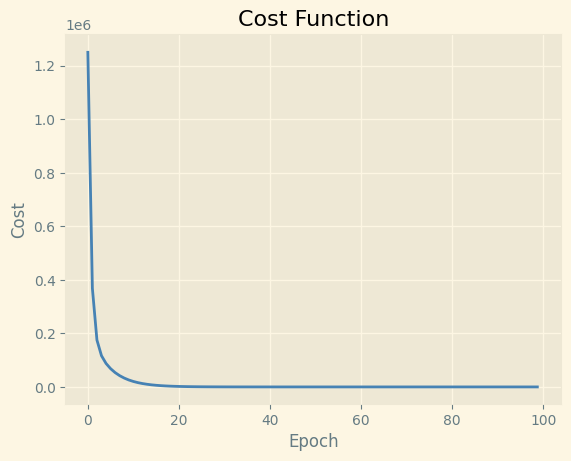

In [131]:
main(alpha_widget,options_widget,iters)